The optimized paramters:  [9.39769569 7.41780847]
The covariance array:  [[0.0010944]]
The obtained resistance values:  134.8107064514672 ohms
Chi Squared Values:  2.8700497468669943


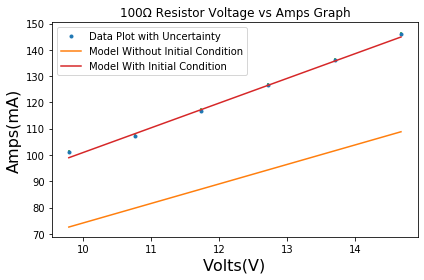

In [12]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def linear_model(x,m, b):
    return (m*x)+b
def linear_model_slope(x,m):
    return m*x
def chi_squared_red(obs, model, err, num_params=2):
    ratio = 1/(len(obs)-num_params)
    summation = np.sum(((obs-model)**2)/err**2)
    return ratio*summation

data = np.loadtxt('./Exercise 0.txt', skiprows=1, delimiter=',')
voltage = data[:,0]
amps = data[:,1]
resistance = data[:,2]
errors = np.ones(len(voltage))
popt, pcov = curve_fit(linear_model, voltage, amps,p0=[9.959,30], sigma=errors, absolute_sigma=True)
pstd = np.sqrt(np.diag(pcov))
popt1, pcov = curve_fit(linear_model_slope, voltage, amps,p0=[9.959], sigma=errors, absolute_sigma=True)
fig,ax = plt.subplots()
ax.plot(voltage, amps, linestyle="",marker=".")
ax.plot(voltage, linear_model_slope(voltage, popt[1]))
ax.set_title('100Ω Resistor Voltage vs Amps Graph')
ax.errorbar(voltage, amps, yerr=data[:,6], ls="none")
ax.plot(voltage, linear_model(voltage,popt[0], 7))
ax.set_xlabel('Volts(V)', fontsize=16)
ax.set_ylabel('Amps(mA)', fontsize=16)
fig.tight_layout()
ax.legend(['Data Plot with Uncertainty','Model Without Initial Condition','Model With Initial Condition'])

print('The optimized paramters: ',popt)
print('The covariance array: ',pcov)
print('The obtained resistance values: ', 1000/popt[1], 'ohms')
print('Chi Squared Values: ', chi_squared_red(amps, linear_model(voltage,popt[0], 7),data[:,5]))


